In [1]:
! pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 54kB/s 


In [2]:
! pip install keras

In [3]:
! pip install pandas

In [5]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.0
Hub version: 0.9.0
GPU is available


In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
#from keras.applications.inception_v3 import InceptionV3
#from keras.applications.inception_v3 import preprocess_input, decode_predictions

In [7]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import os
import cv2

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
train_X = []
train_y = []
IMG_SIZE = 224
DIR1 = "/content/drive/My Drive/Colab Notebooks/Cotton/train/"
train_data = os.listdir(DIR1)
train_data

['diseased cotton leaf', 'fresh cotton leaf']

In [47]:
for file in train_data:
    filename = os.path.join(DIR1, file)
    
    if file=='fresh cotton leaf':
      label=0
    else:
      label=1

    print("Folder {} started".format(file))
    try:
        for img in os.listdir(filename):
            path = os.path.join(filename, img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            train_X.append(np.array(img))
            train_y.append(label)
    except:
        print("File {} not read".format(path))
        
    print("Folder {} done".format(file))
    print("The folder {} is labeled as {}".format(file, label))

Folder diseased cotton leaf started
Folder diseased cotton leaf done
The folder diseased cotton leaf is labeled as 1
Folder fresh cotton leaf started
Folder fresh cotton leaf done
The folder fresh cotton leaf is labeled as 0


In [48]:
test_X = []
test_y = []
IMG_SIZE = 224
DIR2 = "/content/drive/My Drive/Colab Notebooks/Cotton/validat/"
test_data = os.listdir(DIR2)
test_data

['diseased cotton leaf', 'fresh cotton leaf']

In [49]:
for file in test_data:
    filename = os.path.join(DIR2, file)

    if file=='fresh cotton leaf':
      label=0
    else:
      label=1
    print("Folder {} started".format(file))
    try:
        for img in os.listdir(filename):
            path = os.path.join(filename, img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            test_X.append(np.array(img))
            test_y.append(label)
    except:
        print("File {} not read".format(path))
        
    print("Folder {} done".format(file))
    print("The folder {} is labeled as {}".format(file, label))

Folder diseased cotton leaf started
Folder diseased cotton leaf done
The folder diseased cotton leaf is labeled as 1
Folder fresh cotton leaf started
Folder fresh cotton leaf done
The folder fresh cotton leaf is labeled as 0


In [50]:
eval_X = []
eval_y = []
IMG_SIZE = 224
DIR3 = "/content/drive/My Drive/Colab Notebooks/Cotton/eval/"
eval_data = os.listdir(DIR3)
eval_data

['diseased cotton leaf', 'fresh cotton leaf']

In [51]:
for file in eval_data:
    filename = os.path.join(DIR3, file)
 
    if file=='fresh cotton leaf':
      label=0
    else:
      label=1
    print("Folder {} started".format(file))
    try:
        for img in os.listdir(filename):
            path = os.path.join(filename, img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            eval_X.append(np.array(img))
            eval_y.append(label)
    except:
        print("File {} not read".format(path))
        
    print("Folder {} done".format(file))
    print("The folder {} is labeled as {}".format(file, label))

Folder diseased cotton leaf started
Folder diseased cotton leaf done
The folder diseased cotton leaf is labeled as 1
Folder fresh cotton leaf started
Folder fresh cotton leaf done
The folder fresh cotton leaf is labeled as 0


[527, 585, 317, 212, 377, 325, 409, 211, 636, 127]


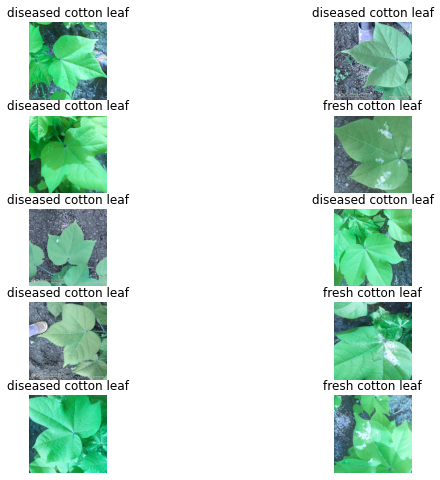

In [56]:
import random
from random import sample
plt.figure(figsize=(10,10))
random_indexes = sample(range(1, 700), 10)
print(random_indexes)
for i, img_index in enumerate(random_indexes):

  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(6,2, i + 1)
  sp.set_title(train_data[train_y[img_index]])
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(train_X[img_index])


In [57]:
random_state = 100
train_X, train_y = shuffle(train_X, train_y, random_state = random_state)
test_X, test_y = shuffle(test_X, test_y, random_state = random_state)
eval_X, eval_y = shuffle(eval_X, eval_y, random_state = random_state)


In [58]:
train_X = np.array(train_X)
train_y = np.array(train_y)

test_X = np.array(test_X)
test_y = np.array(test_y)

eval_X = np.array(eval_X)
eval_y = np.array(eval_y)

print("train_X shape is {}".format(train_X.shape))
print("train_y shape is {}".format(train_y.shape))

print('\n')

print("test_X shape is {}".format(test_X.shape))
print("test_y shape is {}".format(test_y.shape))

print('\n')

print("eval_X shape is {}".format(eval_X.shape))
print("eval_y shape is {}".format(eval_y.shape))

train_X shape is (730, 224, 224, 3)
train_y shape is (730,)


test_X shape is (133, 224, 224, 3)
test_y shape is (133,)


eval_X shape is (8, 224, 224, 3)
eval_y shape is (8,)


In [59]:
from tensorflow.keras.utils import to_categorical

print("Before the categorical the shape of train_y is {}".format(train_y.shape))
train_y = to_categorical(train_y)
print("After the categorical the shape of train_y is {}".format(train_y.shape))

print('\n')

print("Before the categorical the shape of test_y is {}".format(test_y.shape))
test_y = to_categorical(test_y)
print("After the categorical the shape of test_y is {}".format(test_y.shape))

print('\n')

print("Before the categorical the shape of eval_y is {}".format(eval_y.shape))
eval_y = to_categorical(eval_y)
print("After the categorical the shape of eval_y is {}".format(eval_y.shape))


Before the categorical the shape of train_y is (730,)
After the categorical the shape of train_y is (730, 2)


Before the categorical the shape of test_y is (133,)
After the categorical the shape of test_y is (133, 2)


Before the categorical the shape of eval_y is (8,)
After the categorical the shape of eval_y is (8, 2)


In [60]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(
      rescale = 1./255)

evaluation_datagen = ImageDataGenerator(
      rescale = 1./255)

In [61]:
training_set=training_datagen.flow(train_X,train_y)
test_set=validation_datagen.flow(test_X,test_y)
eval_set=evaluation_datagen.flow(eval_X,eval_y)

In [62]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of InceptionV3",
# Here we will be using imagenet weights\n"
IMAGE_SIZE=[224,224]
vgg= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [63]:
# don't train existing weights\n",
for layer in vgg.layers:
    layer.trainable = False

In [64]:
folders = glob('/content/drive/My Drive/Colab Notebooks/Cotton/train/*')
len(folders)

2

In [65]:
x = Flatten()(vgg.output)

In [66]:

prediction=Dense(len(folders), activation='softmax')(x)

In [67]:
model = Model(inputs=vgg.input, outputs=prediction)

In [68]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [69]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [70]:
batch_size=32
r= model.fit_generator(training_set,epochs = 10, validation_data = test_set,verbose = 1, steps_per_epoch=train_X.shape[0] // batch_size,validation_steps=test_X.shape[0] // batch_size)

Epoch 1/10
22/22 [==============================] - 8s 345ms/step - loss: 0.9676 - accuracy: 0.6848 - val_loss: 0.3146 - val_accuracy: 0.8594
Epoch 2/10
22/22 [==============================] - 7s 323ms/step - loss: 0.3067 - accuracy: 0.8625 - val_loss: 0.2134 - val_accuracy: 0.9219
Epoch 3/10
22/22 [==============================] - 7s 323ms/step - loss: 0.1994 - accuracy: 0.9355 - val_loss: 0.1590 - val_accuracy: 0.9219
Epoch 4/10
22/22 [==============================] - 7s 319ms/step - loss: 0.1742 - accuracy: 0.9355 - val_loss: 0.1364 - val_accuracy: 0.9531
Epoch 5/10
22/22 [==============================] - 7s 324ms/step - loss: 0.1851 - accuracy: 0.9169 - val_loss: 0.1181 - val_accuracy: 0.9453
Epoch 6/10
22/22 [==============================] - 7s 319ms/step - loss: 0.2100 - accuracy: 0.9155 - val_loss: 0.1510 - val_accuracy: 0.9297
Epoch 7/10
22/22 [==============================] - 7s 322ms/step - loss: 0.1563 - accuracy: 0.9413 - val_loss: 0.1187 - val_accuracy: 0.9531
Epoch 

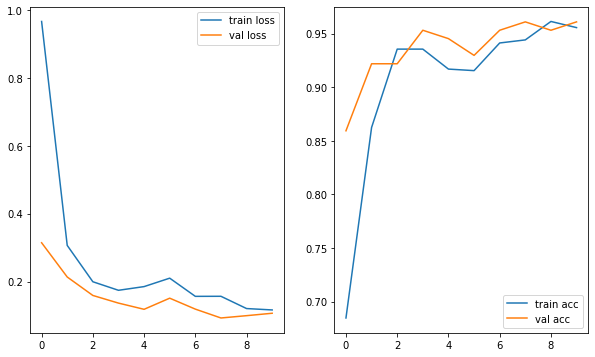

In [71]:
# plot the loss
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.subplot(1,2,2)
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc')

In [72]:
k=r.history['val_accuracy']
print('The Validation Accuracy of VGG19 Model: ', np.mean(k))

The Validation Accuracy of VGG19 Model:  0.9359375


In [73]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('cotton_model_vgg19.h5')

In [74]:
y_pred = model.predict(test_X)
y_pred_digits = np.argmax(y_pred, axis=1)
y_pred_digits

y_pred_labels = np.unique(y_pred_digits, return_counts=True)
y_pred_labels


(array([0, 1]), array([54, 79]))

In [77]:
real_labels= np.argmax(test_y, axis=1)
real_labels
real_labels1 = np.unique(real_labels, return_counts=True)
real_labels1

(array([0, 1]), array([79, 54]))

In [78]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(real_labels, y_pred_digits)
c_m

array([[51, 28],
       [ 3, 51]])

Text(32.99999999999999, 0.5, 'Actual')

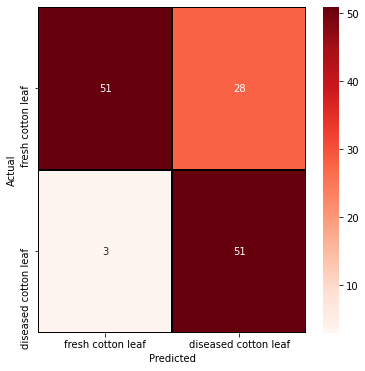

In [84]:
labels=['fresh cotton leaf', 'diseased cotton leaf']
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = labels , yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [80]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
acc_score = accuracy_score(real_labels, y_pred_digits)
acc_score

0.7669172932330827

In [81]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(real_labels)):
    if(real_labels[i] == y_pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==10):
        break
i=0
for i in range(len(real_labels)):
    if(real_labels[i] != y_pred_digits[i]):
        mis_class.append(i)


In [82]:
print(len(mis_class))

31


[5, 3, 7, 9, 8, 6, 4, 2, 0, 1]


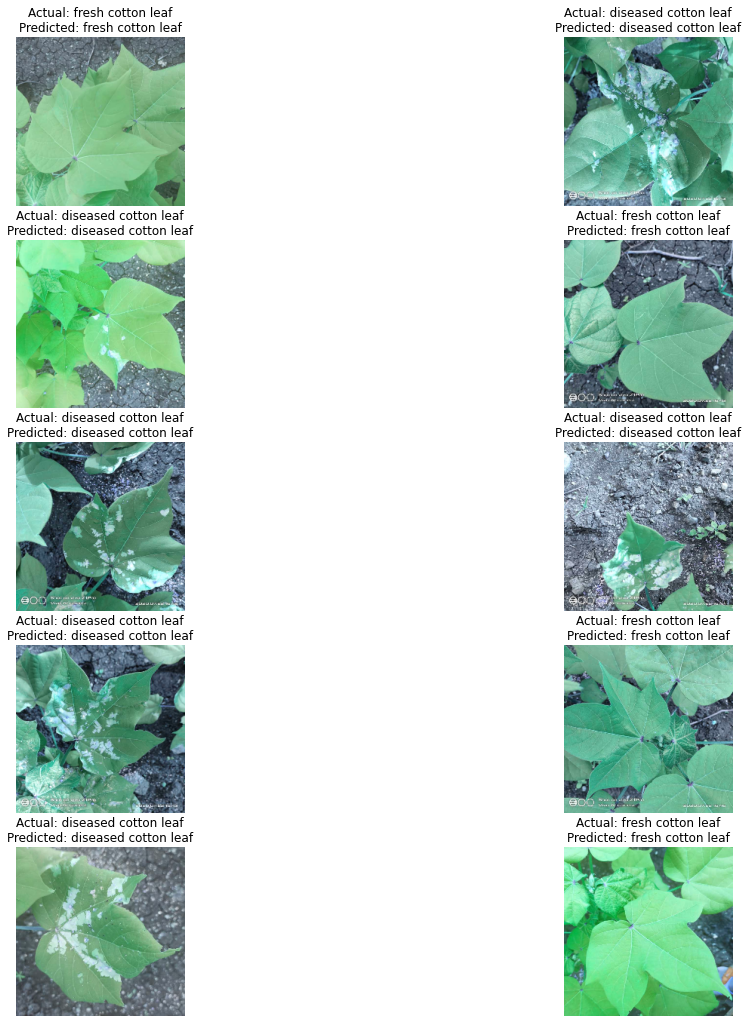

In [85]:
labels_names={0:'fresh cotton leaf', 1:'diseased cotton leaf' }
#fig.set_size_inches(8,8)
import random
from random import sample
plt.figure(figsize=(18,18))
random_indexes = sample(range(0, 10), 10)
print(random_indexes)
for i, img_index in enumerate(random_indexes):

  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(5, 2, i + 1)
  sp.set_title('Actual: '+ labels_names[real_labels[prop_class[img_index]]]+ '\n' + 'Predicted: ' + labels_names[y_pred_digits[prop_class[img_index]]])
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(test_X[prop_class[img_index]])

[7, 6, 2, 9, 8, 3, 5, 4, 1, 0]


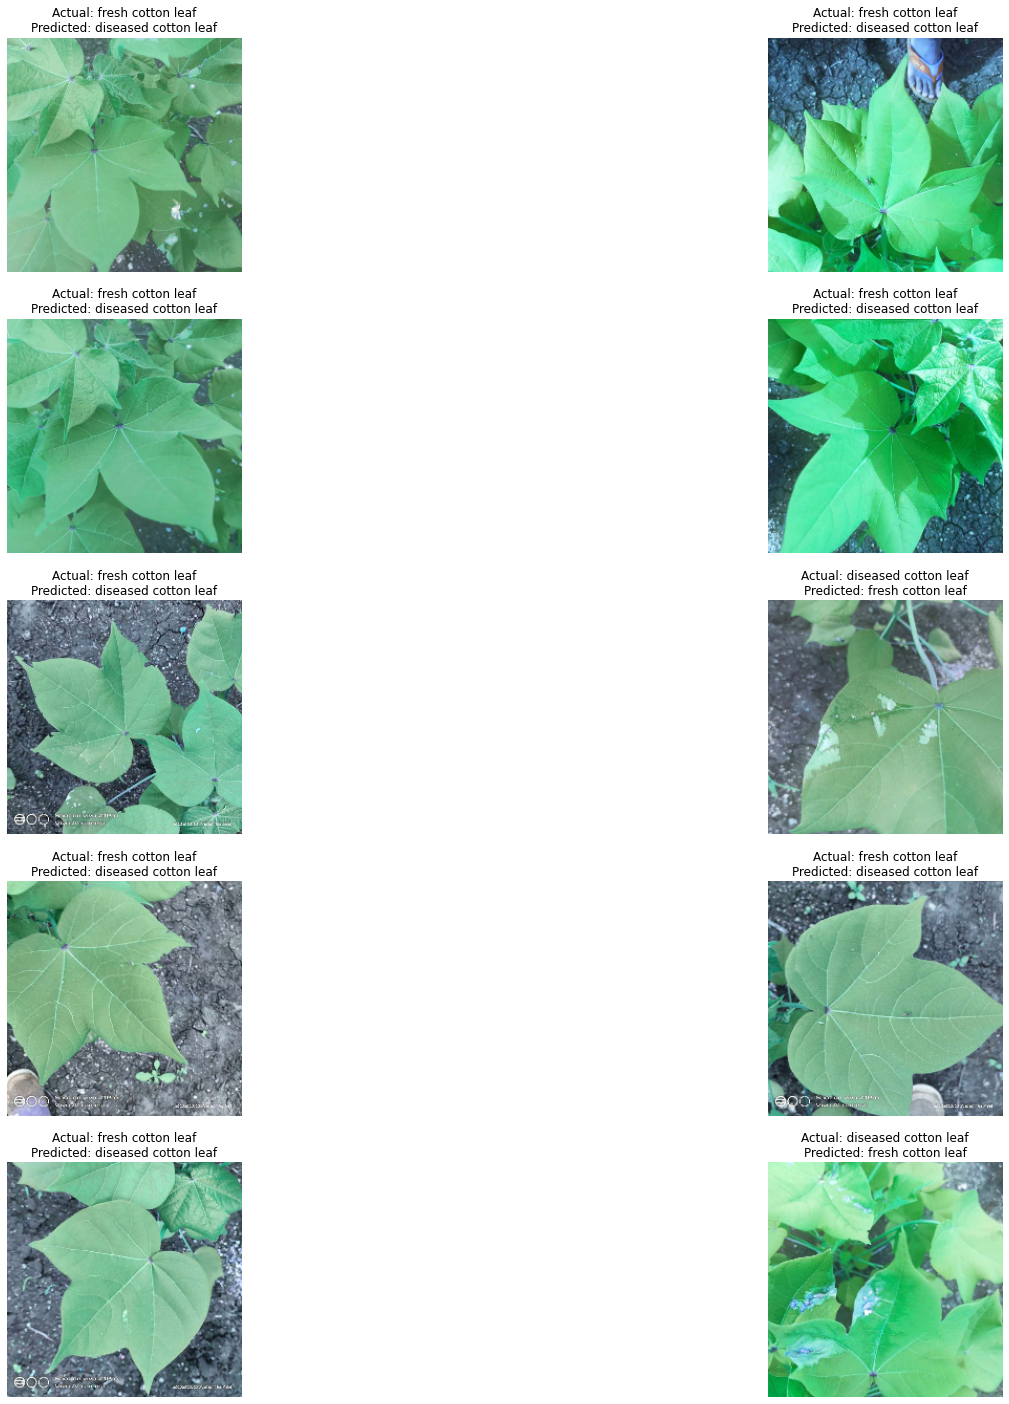

In [86]:
labels_names={0:'fresh cotton leaf', 1:'diseased cotton leaf' }
import random
from random import sample

random_indexes = sample(range(0, 10), 10)
print(random_indexes)
plt.figure(figsize=(25,25))
for i, img_index in enumerate(random_indexes):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(5, 2, i + 1)
  sp.set_title('Actual: '+ labels_names[real_labels[mis_class[img_index]]]+ '\n' + 'Predicted: ' + labels_names[y_pred_digits[mis_class[img_index]]])
  sp.axis('Off') # Don't show axes (or gridlines)
  plt.imshow(test_X[mis_class[img_index]])

In [ ]:
# Evaluate The Model with Different Images

In [87]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [88]:
model=load_model('cotton_model_vgg19.h5')

In [89]:
eval_y_pred = model.predict(eval_X)
eval_y_pred_digits = np.argmax(eval_y_pred, axis=1)
eval_y_pred_digits

eval_y_pred_labels = np.unique(eval_y_pred_digits, return_counts=True)
eval_y_pred_labels

(array([0, 1]), array([4, 4]))

In [90]:
eval_real_labels= np.argmax(eval_y, axis=1)
eval_real_labels

eval_real_labels1 = np.unique(eval_real_labels, return_counts=True)
eval_real_labels1

(array([0, 1]), array([5, 3]))

In [91]:
from sklearn.metrics import confusion_matrix
c_m1 = confusion_matrix(eval_real_labels, eval_y_pred_digits)
c_m1

array([[4, 1],
       [0, 3]])

Text(32.99999999999999, 0.5, 'Actual')

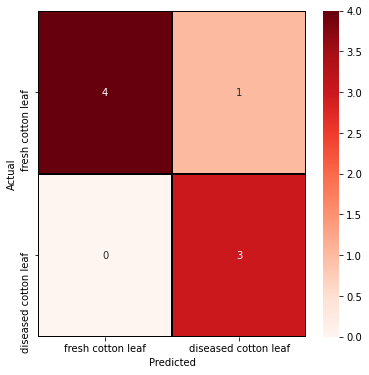

In [93]:
labelss=['fresh cotton leaf','diseased cotton leaf']
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(c_m1,cmap= "Reds", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = labelss , yticklabels = labelss)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [94]:
results = model.evaluate(eval_X, eval_y, batch_size=32)
print("test loss, test acc:", results)



1/1 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.8750
test loss, test acc: [0.11722653359174728, 0.875]


In [95]:
img=image.load_img('/content/drive/My Drive/Colab Notebooks/cotton_data/dis_leaf (149)_iaip.jpg',target_size=(224,224))

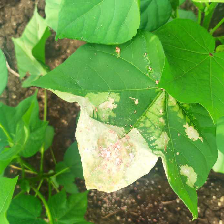

In [96]:
img


In [97]:
y=image.img_to_array(img)
y=np.expand_dims(y,axis=0)
imgy=preprocess_input(y)
imgy=imgy/255

In [98]:
preds= model.predict(imgy)
preds

array([[0.02201305, 0.977987  ]], dtype=float32)

In [99]:
a=np.argmax(preds, axis=1)
a

array([1])

In [100]:
if(a==0):
    print("Fresh Cotton Leaf")
else:
    print("Diseased Cotton Leaf")

Diseased Cotton Leaf
